In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,10)
plt.rcParams.update({'font.size': 18})
import pandas as pd

# Plotting the function
$$ f=\frac{x}{\sin x} $$

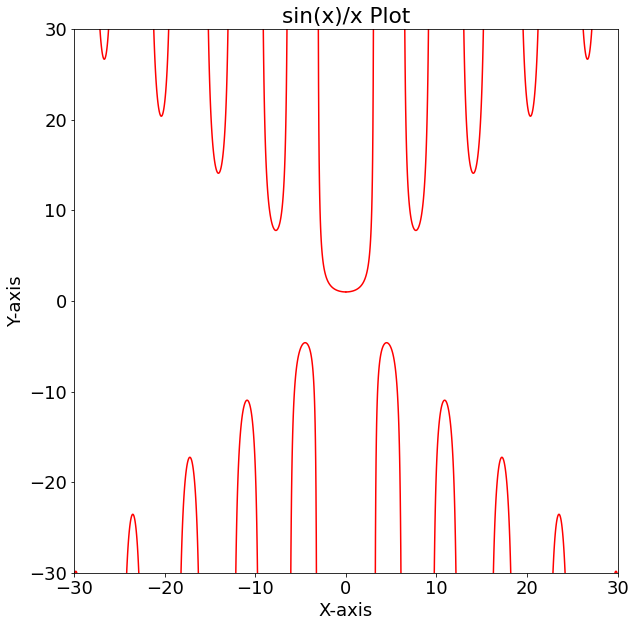

In [48]:
def load(x): return x/math.sin(x)


f = np.vectorize(load)
a = 10
for i in np.arange(-a, a+1):
    x = np.linspace(i*math.pi+0.00000001, i*math.pi+math.pi-0.00000001, 100)
    y = f(x)
    plt.plot(x, y, 'r')
plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.title('sin(x)/x Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
ax = plt.gca()
ax.set_aspect('equal')
